<a href="https://colab.research.google.com/github/Byeon-MJ/DL_Practice_Repo/blob/main/Data_Handling_Datasets_Pima_Indian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 피마 인디언 데이터 분석하기

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## pandas를 활용한 데이터 조사

In [2]:
import pandas as pd
df = pd.read_csv("/content/gdrive/MyDrive/Study/Everyone's DeepLearning/dataset/pima-indians-diabetes.csv", 
                 names = ['pregnant', 'plasma', 'pressure', 'thickness', 'insulin', 'BMI', 'pedigree', 'age', 'class'])

In [3]:
df.head()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df[['pregnant', 'class']]

,pregnant,class
0,6,1
1,1,0
2,8,1
3,1,0
4,0,1
...,...,...
763,10,0
764,2,0
765,5,0
766,1,1


## 데이터 가공하기

In [9]:
df[['pregnant', 'class']].groupby(['pregnant'], as_index=False).mean().sort_values(by='pregnant', ascending=True)

,pregnant,class
0,0,0.342342
1,1,0.214815
2,2,0.184466
3,3,0.360000
4,4,0.338235
5,5,0.368421
6,6,0.320000
7,7,0.555556
8,8,0.578947
9,9,0.642857


## matplotlib을 이용해 그래프로 표현하기

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

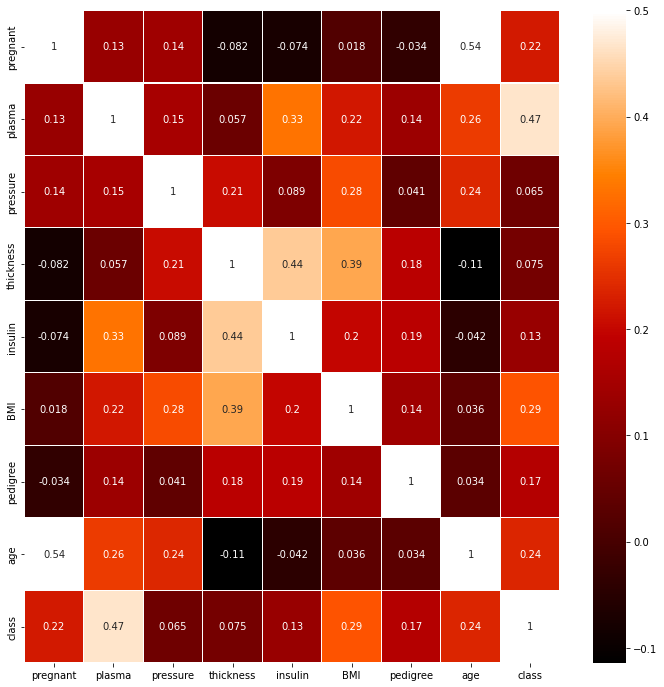

In [12]:
# cmap 색상 설정갑 확인 : https://matplotlib.org/users/colormaps.html
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=plt.cm.gist_heat, linecolor='white', annot=True)
plt.show()

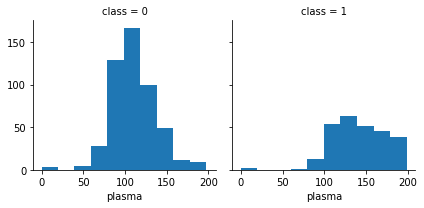

In [14]:
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma', bins=10)
plt.show()

## 피마 인디언의 당뇨병 예측 실행

In [17]:
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense

# seed 생성
np.random.seed(3)
tf.random.set_seed(3)

In [18]:
# 데이터 로드
dataset = np.loadtxt("/content/gdrive/MyDrive/Study/Everyone's DeepLearning/dataset/pima-indians-diabetes.csv", delimiter=',')
X = dataset[:, 0:8]
Y = dataset[:, 8]

In [20]:
# 모델 정의
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [21]:
# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
# 모델 학습
history = model.fit(X, Y, epochs=200, batch_size=10)

Epoch 1/200
77/77 [==============================] - 0s 1ms/step - loss: 0.4333 - accuracy: 0.8021
Epoch 2/200
77/77 [==============================] - 0s 1ms/step - loss: 0.4305 - accuracy: 0.8008
Epoch 3/200
77/77 [==============================] - 0s 1ms/step - loss: 0.4285 - accuracy: 0.7878
Epoch 4/200
77/77 [==============================] - 0s 1ms/step - loss: 0.4283 - accuracy: 0.7956
Epoch 5/200
77/77 [==============================] - 0s 1ms/step - loss: 0.4289 - accuracy: 0.7956
Epoch 6/200
77/77 [==============================] - 0s 1ms/step - loss: 0.4340 - accuracy: 0.7917
Epoch 7/200
77/77 [==============================] - 0s 1ms/step - loss: 0.4402 - accuracy: 0.7943
Epoch 8/200
77/77 [==============================] - 0s 970us/step - loss: 0.4410 - accuracy: 0.7917
Epoch 9/200
77/77 [==============================] - 0s 1ms/step - loss: 0.4345 - accuracy: 0.7852
Epoch 10/200
77/77 [==============================] - 0s 1ms/step - loss: 0.4356 - accuracy: 0.7852
Epoch 1

In [25]:
# 결과 출력
print(f'Accuracy : {model.evaluate(X, Y)[1]:.4f}')

24/24 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.7708
Accuracy : 0.7708


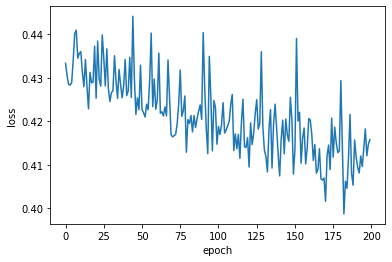

In [33]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()